In [3]:
from time import time

import numpy as np
import matplotlib.pyplot as plt

In [121]:
def add_constant_column(x):
    return np.concatenate([np.ones((x.shape[0], 1)), x], axis=1)

def generate_data(n_examples, n_features, sigma=0.1):
    k = np.random.randn(n_features + 1, 1)
    b = np.random.randint(-10, 10)
    x = np.random.rand(n_examples, n_features)
    x = add_constant_column(x)
    noise = sigma * np.random.randn(n_examples, 1)
    y = np.dot(x, k) + noise
    return x, y, noise

def plot_line(k, m, interval):
    x = np.linspace(*interval, num=20)
    y = k * x + m
    plt.plot(x, y)

def loss(x, y, beta):
    e = residuals(x, y, beta)
    return np.mean(np.dot(e.T, e))

def residuals(x, y, beta):
    return y - np.dot(x, beta)

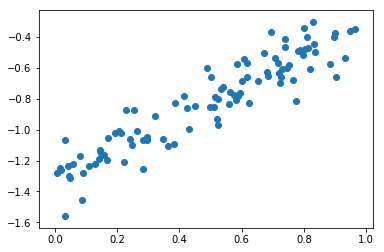

In [112]:
x, y, noise = generate_data(100, 1)
plt.scatter(x[:, 1], y.reshape(-1))

### OLS

In [113]:
def least_squares(x, y):
    inv = np.linalg.inv(np.dot(x.T, x))
    inv_x = np.dot(inv, x.T)
    p = np.dot(inv_x, y)
    
    return p

In [114]:
n_features = 1
x, y, noise = generate_data(100, n_features)

beta = least_squares(x, y)

dims = [np.linspace(0, 1, 10) for _ in range(n_features)]
xx = np.concatenate(
    [a.reshape(-1, 1) for a in np.meshgrid(*dims)],
    axis=1
)
xx = add_constant_column(xx)
yy = np.dot(xx, beta)

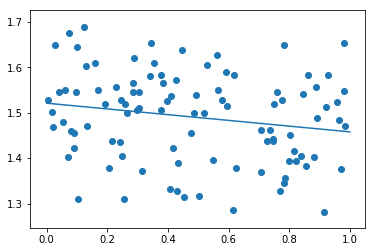

In [115]:
if n_features == 1:
    plt.scatter(x[:, 1], y)
    plt.plot(xx[:, 1], yy[:, 0])

In [116]:
print(loss(x, y, beta))

0.918177061255864


In [8]:
examples_test_times = []
n_examples = [10**i for i in range(1, 8)]
n_features = 10

for n in n_examples:
    x, y, noise = generate_data(n_examples=n, n_features=n_features)
    t0 = time()
    _ = least_squares(x, y)
    t = time() - t0
    examples_test_times.append(t)

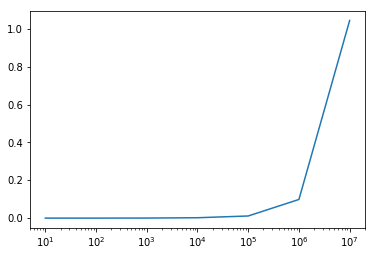

In [9]:
plt.semilogx(n_examples, examples_test_times)

In [14]:
feature_test_times = []
n_examples = 10
n_features = [10**i for i in range(1, 4)] + [2000, 3000, 4000]

for n in n_features:
    x, y, noise = generate_data(n_examples=n_examples, n_features=n)
    t0 = time()
    _ = least_squares(x, y)
    t = time() - t0
    feature_test_times.append(t)

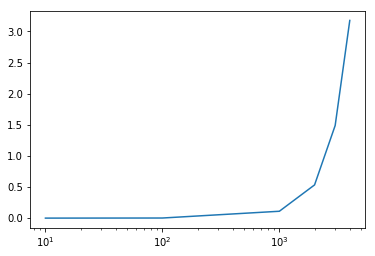

In [15]:
plt.semilogx(n_features, feature_test_times)

Note, the "wide" test slows down significantly already at 10^4 features.

## Iterative solution

In [185]:
n_features = 1
x, y, noise = generate_data(n_examples=100, n_features=n_features, sigma=0.01)
beta = np.zeros((x.shape[1], 1))
lr = 1e-4
n_iter = 1001
losses = []
residuals_ = []

In [186]:
def grad(x, y, beta):
    dx = -2 * np.dot(x.T, y) + 2 * np.dot(np.dot(x.T, x), beta)
    return dx

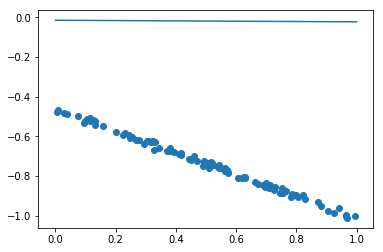

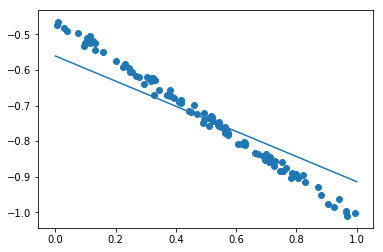

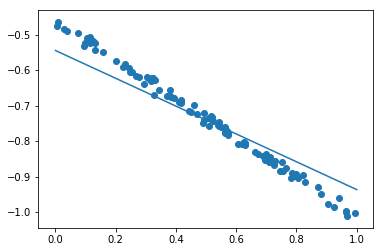

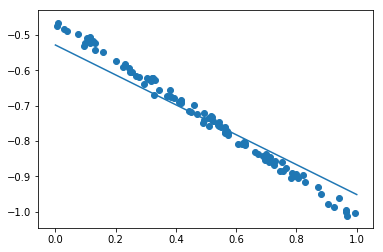

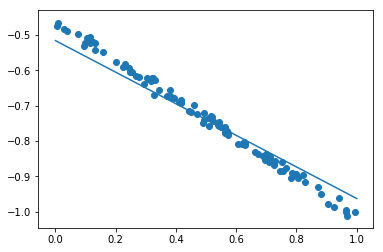

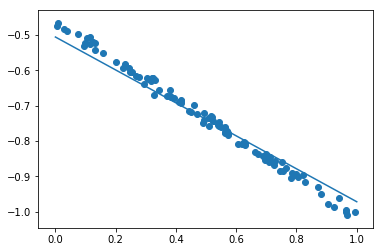

In [187]:
for i in range(n_iter):
    dx = grad(x=x, y=y, beta=beta)
    beta = beta - lr * dx
    residuals_.append(residuals(x, y, beta).sum())
    losses.append(loss(x, y, beta))
    if i % 200 == 0 and n_features == 1:
        plot_line(k=beta[1], m=beta[0], interval=(0, 1))
        plt.scatter(x[:, 1], y)
        plt.show()

0.05763207635546917


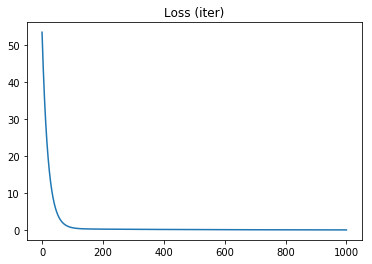

In [188]:
plt.plot(losses)
plt.title('Loss (iter)')
print(losses[-1])

Text(0.5,1,'Sum of residuals (iter)')

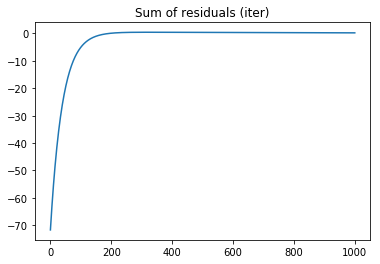

In [190]:
plt.plot(residuals_)
plt.title('Sum of residuals (iter)')

### Notes

We get into overflow when having too many features for the iterative solution

## Investigate properties of OLS

### 1. The residuals are perpendicular to X

In [167]:
n_features = 10
n_examples = 100
x, y, noise = generate_data(n_examples=n_examples, n_features=n_features, sigma=0.01)
beta = least_squares(x, y)

In [168]:
r = residuals(x, y, beta)

In [169]:
np.dot(x.T, r).max()

2.785472328994597e-14

### Note

OLS behaves bad when having less examples than features. The residuals stops being close to zero.

### 2. The sum of residuals is zero.

In [170]:
r.sum()

1.952604744559494e-14

### 3. The sample mean of the residuals is zero.

Follows trivially from 2